<a href="https://colab.research.google.com/github/Micaiah4data/Amazon_Dashboard/blob/main/Inception_V3_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from google.colab import files
from google.colab import drive
import glob
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataframe = pd.read_csv('benign-and-malignant-images-labels-final.csv')
directory = '/content/Benign-and-Malignant-Images'

In [6]:
image_list = []
for i in range(1, 282):
  filename = directory + "/" + str(i) + ".jpg"
  image = load_img(filename, target_size = (224, 224))
  image_list.append(np.array(image))

In [7]:
for i in range(281):
    if dataframe['benign_malignant'][i] == "malignant":
        dataframe['benign_malignant'][i] = 1
    elif dataframe['benign_malignant'][i] == "benign":
        dataframe['benign_malignant'][i] = 0
    else:
        dataframe['benign_malignant'][i] = -1

<ipython-input-7-1b4dba39b1f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['benign_malignant'][i] = 1
<ipython-input-7-1b4dba39b1f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['benign_malignant'][i] = 1
<ipython-input-7-1b4dba39b1f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['benign_malignant'][i] = 1
<ipython-input-7-1b4dba39b1f7>:3: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
dataframe['images'] = image_list

In [9]:
dataframeShuffled = shuffle(dataframe)

In [10]:
train_ds, test_ds, train_labels, test_labels = train_test_split(dataframeShuffled['images'].tolist(), dataframeShuffled['benign_malignant'], test_size =  0.33, random_state = 1)
train_labels_processed = to_categorical(train_labels, num_classes=5)
test_labels_processed = to_categorical(test_labels, num_classes=5)

In [11]:
train_ds = tf.image.resize(train_ds, (299, 299))
test_ds = tf.image.resize(test_ds, (299, 299))

In [12]:
base_model = tf.keras.applications.InceptionV3(input_shape = (299, 299, 3), include_top=False, weights='imagenet')
base_model.trainable = False

train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

87910968/87910968 [==============================] - 1s 0us/step


In [13]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [14]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

results = model.fit(train_ds, train_labels_processed, epochs=50, validation_split=0.4, batch_size=16, callbacks=[es])

Epoch 1/50
7/7 [==============================] - 20s 1s/step - loss: 64.4068 - accuracy: 0.6786 - val_loss: 41.3563 - val_accuracy: 0.8553
Epoch 2/50
7/7 [==============================] - 1s 153ms/step - loss: 9.5078 - accuracy: 0.9554 - val_loss: 51.8102 - val_accuracy: 0.8816
Epoch 3/50
7/7 [==============================] - 1s 141ms/step - loss: 2.3098 - accuracy: 0.9554 - val_loss: 46.4597 - val_accuracy: 0.8947
Epoch 4/50
7/7 [==============================] - 1s 120ms/step - loss: 16.6533 - accuracy: 0.9643 - val_loss: 47.1357 - val_accuracy: 0.8947
Epoch 5/50
7/7 [==============================] - 1s 144ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 76.5462 - val_accuracy: 0.9079
Epoch 6/50
7/7 [==============================] - 1s 123ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 92.4812 - val_accuracy: 0.9079
Epoch 7/50
7/7 [==============================] - 1s 129ms/step - loss: 2.4475 - accuracy: 0.9821 - val_loss: 79.8714 - val_accuracy: 0.8421
Epoch

Text(0.5, 1.0, 'Loss')

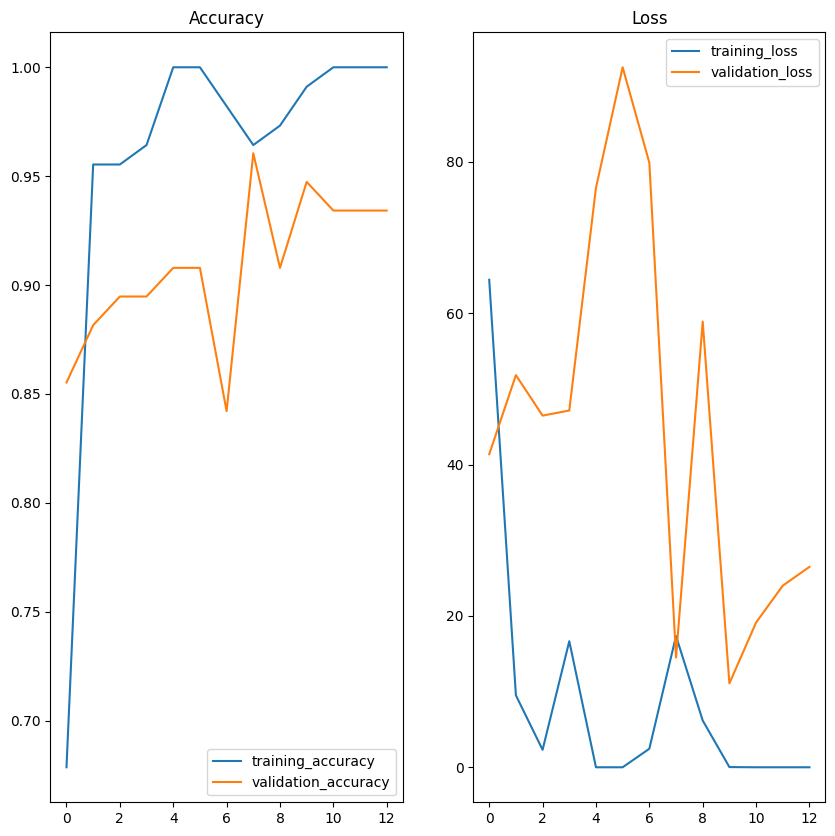

In [17]:
# Calculate the actual number of epochs run
num_epochs_run = len(accuracy)
epoch_number = range(num_epochs_run)  # Update epoch_number to match

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epoch_number, accuracy, label = 'training_accuracy')
plt.plot(epoch_number, validation_accuracy, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_number, loss, label = 'training_loss')
plt.plot(epoch_number, validation_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('Loss')

In [18]:
preds = model.evaluate(test_ds, test_labels_processed)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 [==============================] - 9s 2s/step - loss: 12.3876 - accuracy: 0.9785
Loss = 12.387639045715332
Test Accuracy = 0.9784946441650391


In [19]:
preds = model.predict(test_ds)
predictions = []
for i in range(0, 93):
  predictions.append(np.argmax(tf.nn.softmax(preds[i])))

3/3 [==============================] - 3s 152ms/step


In [20]:
!pip install torchmetrics
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [21]:
from torchmetrics import JaccardIndex
from torchmetrics.functional import dice
import torch

In [22]:
jaccard = JaccardIndex(task="multiclass", num_classes=2)

In [23]:
print("This is the Jaccard index: " + str(jaccard(torch.from_numpy(np.array(predictions)), torch.from_numpy(np.array(test_labels).astype('float32')))))
print("This is the Dice Similarity Coefficient: " + str(dice(torch.from_numpy(np.array(test_labels).astype('float32')), torch.from_numpy(np.array(predictions)), average = 'micro')))

This is the Jaccard index: tensor(0.9579)
This is the Dice Similarity Coefficient: tensor(0.9783)


In [24]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(torch.from_numpy(np.array(test_labels).astype('float32')), np.array(predictions))
x

array([[46,  2],
       [ 0, 45]])

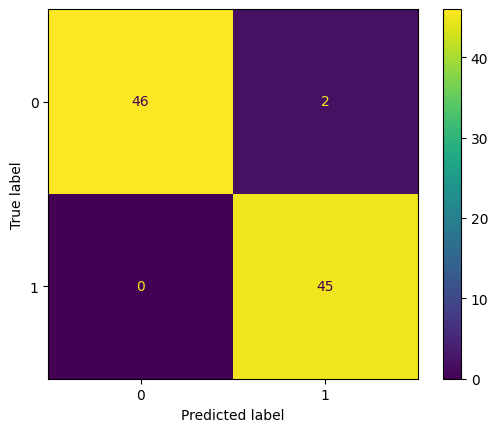

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                    random_state=0)
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)

# predictions = clf.predict(X_test)
# cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=x,
                              display_labels={0, 1})
disp.plot()

plt.show()